In [73]:
import pandas as pd
df = pd.read_csv('../input/renewable/renewable_power_plants_PL.csv')
df.head(5)

,district,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,electrical_capacity,number_of_installations,data_source,as_of_year
0,Biała Podlaska,Renewable energy,Bioenergy,Biomass and biogas,NaN,0.504,1,Urzad Regulacji Energetyki,2016
1,Biała Podlaska,Renewable energy,Solar,NaN,Photovoltaics,0.300,1,Urzad Regulacji Energetyki,2016
2,Biała Podlaska,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,0.252,1,Urzad Regulacji Energetyki,2016
3,Białystok,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,1.532,1,Urzad Regulacji Energetyki,2016
4,Białystok,Renewable energy,Solar,NaN,Photovoltaics,0.123,6,Urzad Regulacji Energetyki,2016


In [74]:
df.tail(5)

,district,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,electrical_capacity,number_of_installations,data_source,as_of_year
1036,żyrardowski,Renewable energy,Solar,NaN,Photovoltaics,0.030,3,Urzad Regulacji Energetyki,2016
1037,żywiecki,Renewable energy,Hydro,NaN,Hydro,33.600,2,Urzad Regulacji Energetyki,2016
1038,żywiecki,Renewable energy,Solar,NaN,Photovoltaics,0.118,9,Urzad Regulacji Energetyki,2016
1039,żywiecki,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,0.303,1,Urzad Regulacji Energetyki,2016
1040,żywiecki,Renewable energy,Hydro,NaN,Hydro,0.165,1,Urzad Regulacji Energetyki,2016


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 9 columns):
district                   1041 non-null object
energy_source_level_1      1041 non-null object
energy_source_level_2      1041 non-null object
energy_source_level_3      323 non-null object
technology                 718 non-null object
electrical_capacity        1041 non-null float64
number_of_installations    1041 non-null int64
data_source                1041 non-null object
as_of_year                 1041 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 73.3+ KB


In [76]:
df.shape

(1041, 9)

In [77]:
df.columns

Index(['district', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'technology', 'electrical_capacity',
       'number_of_installations', 'data_source', 'as_of_year'],
      dtype='object')

In [78]:
df.rename(columns={
        'energy_source_level_1': 'energy_1', 
        'energy_source_level_2': 'energy_2',
        'energy_source_level_3': 'energy_3'
    }, inplace=True)

df.columns

Index(['district', 'energy_1', 'energy_2', 'energy_3', 'technology',
       'electrical_capacity', 'number_of_installations', 'data_source',
       'as_of_year'],
      dtype='object')

In [79]:
df.isnull().sum()

district                     0
energy_1                     0
energy_2                     0
energy_3                   718
technology                 323
electrical_capacity          0
number_of_installations      0
data_source                  0
as_of_year                   0
dtype: int64

In [80]:
df.dropna()
df.dropna(axis=1)
df.head(5)

,district,energy_1,energy_2,energy_3,technology,electrical_capacity,number_of_installations,data_source,as_of_year
0,Biała Podlaska,Renewable energy,Bioenergy,Biomass and biogas,NaN,0.504,1,Urzad Regulacji Energetyki,2016
1,Biała Podlaska,Renewable energy,Solar,NaN,Photovoltaics,0.300,1,Urzad Regulacji Energetyki,2016
2,Biała Podlaska,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,0.252,1,Urzad Regulacji Energetyki,2016
3,Białystok,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,1.532,1,Urzad Regulacji Energetyki,2016
4,Białystok,Renewable energy,Solar,NaN,Photovoltaics,0.123,6,Urzad Regulacji Energetyki,2016


In [81]:
capacity = df['electrical_capacity']
capacity.head()

0    0.504
1    0.300
2    0.252
3    1.532
4    0.123
Name: electrical_capacity, dtype: float64

In [82]:
capacity.mean()

8.08409317963497

In [83]:
df.describe()

,electrical_capacity,number_of_installations,as_of_year
count,1041.000000,1041.000000,1041.0
mean,8.084093,2.693564,2016.0
std,28.403121,4.093762,0.0
min,0.000000,1.000000,2016.0
25%,0.124000,1.000000,2016.0
50%,0.558000,1.000000,2016.0
75%,2.080000,3.000000,2016.0
max,511.888000,43.000000,2016.0


In [84]:
df['energy_3'].describe()

count                         323
unique                          2
top       Sewage and landfill gas
freq                          179
Name: energy_3, dtype: object

In [85]:
df.corr()

,electrical_capacity,number_of_installations,as_of_year
electrical_capacity,1.000000,0.422659,NaN
number_of_installations,0.422659,1.000000,NaN
as_of_year,NaN,NaN,NaN


In [86]:
df[df['electrical_capacity'] >= 50].head(5)

,district,energy_1,energy_2,energy_3,technology,electrical_capacity,number_of_installations,data_source,as_of_year
5,Białystok,Renewable energy,Bioenergy,Biomass and biogas,NaN,78.503,1,Urzad Regulacji Energetyki,2016
55,Jaworzno,Renewable energy,Bioenergy,Biomass and biogas,NaN,50.000,1,Urzad Regulacji Energetyki,2016
70,Konin,Renewable energy,Bioenergy,Biomass and biogas,NaN,55.000,1,Urzad Regulacji Energetyki,2016
96,Ostrołęka,Renewable energy,Bioenergy,Biomass and biogas,NaN,100.500,2,Urzad Regulacji Energetyki,2016
100,Poznań,Renewable energy,Bioenergy,Biomass and biogas,NaN,63.000,1,Urzad Regulacji Energetyki,2016


In [87]:
df[(df['energy_2'] == 'solar') | (df['energy_3'] == 'Sewage and landfill gas')].head()

,district,energy_1,energy_2,energy_3,technology,electrical_capacity,number_of_installations,data_source,as_of_year
2,Biała Podlaska,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,0.252,1,Urzad Regulacji Energetyki,2016
3,Białystok,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,1.532,1,Urzad Regulacji Energetyki,2016
6,Bielsko-Biała,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,0.536,1,Urzad Regulacji Energetyki,2016
7,Bielsko-Biała,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,0.750,1,Urzad Regulacji Energetyki,2016
10,Bydgoszcz,Renewable energy,Bioenergy,Sewage and landfill gas,NaN,1.491,2,Urzad Regulacji Energetyki,2016


In [88]:
df[df['technology'].isin(['Hydro'])].head()

,district,energy_1,energy_2,energy_3,technology,electrical_capacity,number_of_installations,data_source,as_of_year
9,Bielsko-Biała,Renewable energy,Hydro,NaN,Hydro,0.023,1,Urzad Regulacji Energetyki,2016
13,Bydgoszcz,Renewable energy,Hydro,NaN,Hydro,0.145,2,Urzad Regulacji Energetyki,2016
14,Bydgoszcz,Renewable energy,Hydro,NaN,Hydro,1.380,2,Urzad Regulacji Energetyki,2016
15,Bydgoszcz,Renewable energy,Hydro,NaN,Hydro,4.000,1,Urzad Regulacji Energetyki,2016
26,Częstochowa,Renewable energy,Hydro,NaN,Hydro,0.130,1,Urzad Regulacji Energetyki,2016


In [89]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'figure.figsize': (5, 5)})

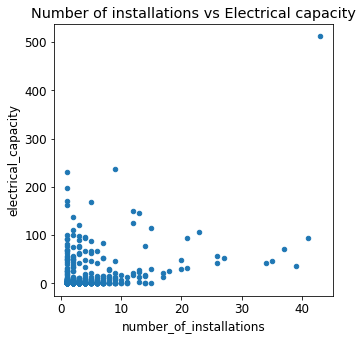

In [90]:
df.plot(kind='scatter', x='number_of_installations', y='electrical_capacity', title='Number of installations vs Electrical capacity');

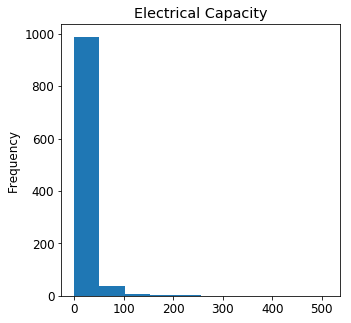

In [91]:
df['electrical_capacity'].plot(kind='hist', title='Electrical Capacity');

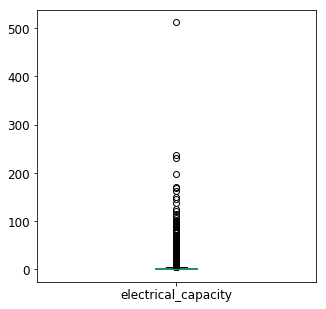

In [92]:
df['electrical_capacity'].plot(kind="box");